In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/Users/abhi/Downloads/archive/train_u6lujuX_CVtuZ9i.csv')

In [4]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
# filling with mode for categorical variables
for column in ['Gender', 'Married', 'Self_Employed', 'Dependents']:
    df[column].fillna(df[column].mode()[0], inplace=True)

# filling with median for numerical variables
for column in ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']:
    df[column].fillna(df[column].median(), inplace=True)

In [10]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [11]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [12]:
df.Loan_ID.nunique()

614

In [13]:
df.Gender.value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

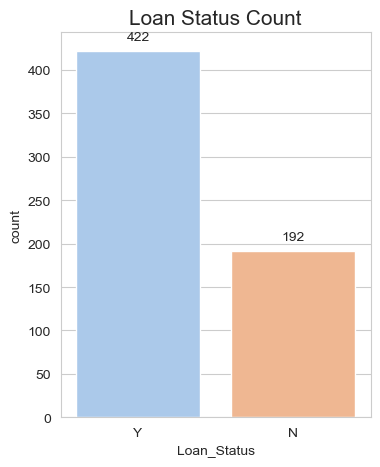

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(4,5))
sns.set_style("whitegrid")
ax = sns.countplot(x='Loan_Status', data=df, palette='pastel')
plt.title('Loan Status Count', fontsize=15)

for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.show()

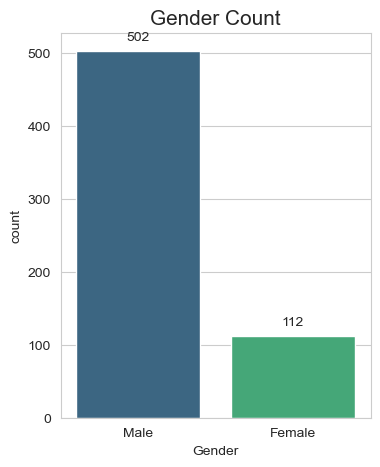

In [15]:
plt.figure(figsize=(4,5))
ax = sns.countplot(x='Gender', data=df, palette='viridis')
plt.title('Gender Count', fontsize=15)

for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.show()

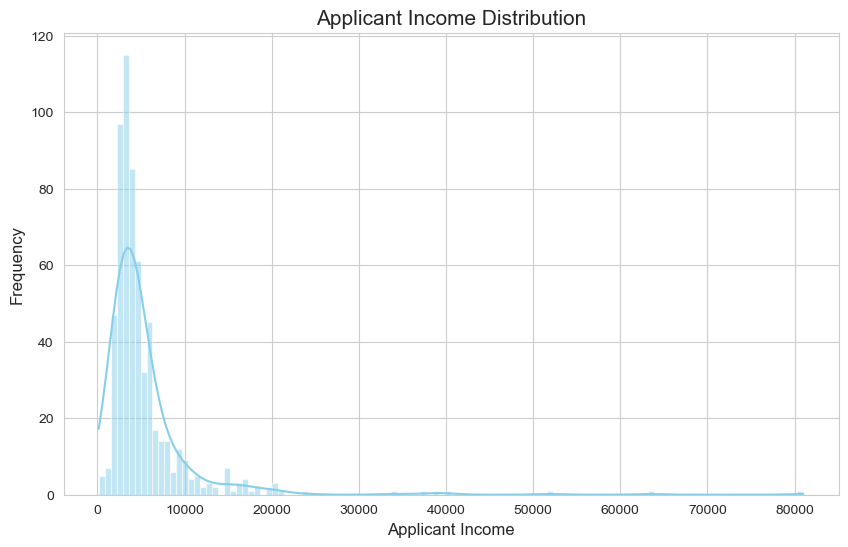

In [16]:
plt.figure(figsize=(10,6))
sns.histplot(df['ApplicantIncome'], kde=True, color='skyblue')
plt.title('Applicant Income Distribution', fontsize=15)
plt.xlabel('Applicant Income', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

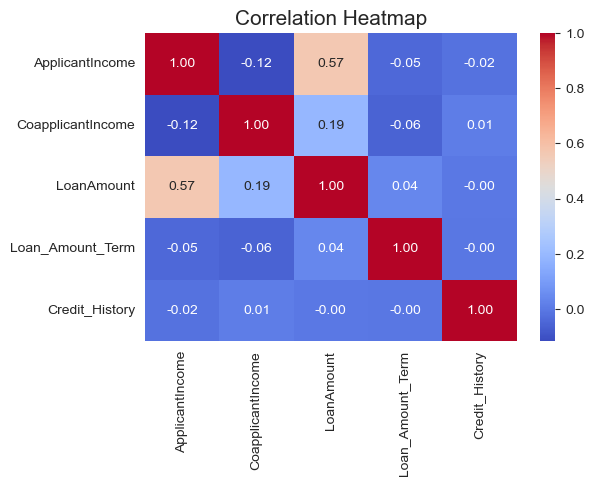

In [17]:
plt.figure(figsize=(6,4))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap', fontsize=15)
plt.show()


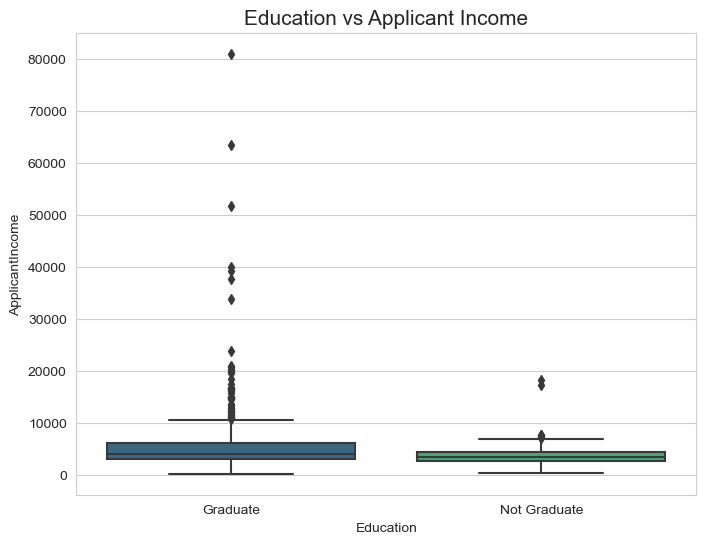

In [18]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Education', y='ApplicantIncome', data=df, palette='viridis')
plt.title('Education vs Applicant Income', fontsize=15)
plt.show()

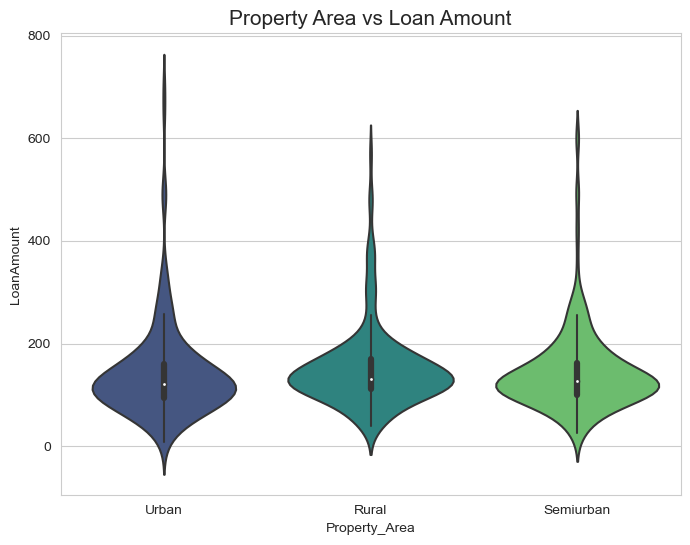

In [19]:
plt.figure(figsize=(8,6))
sns.violinplot(x='Property_Area', y='LoanAmount', data=df, palette='viridis')
plt.title('Property Area vs Loan Amount', fontsize=15)
plt.show()

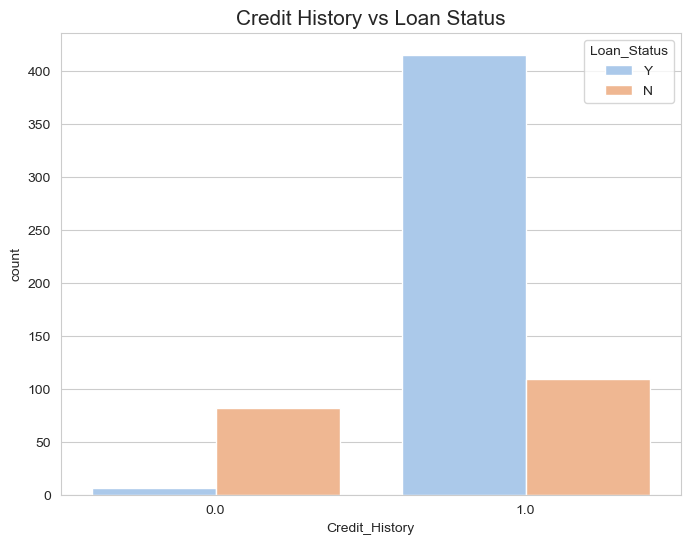

In [20]:
plt.figure(figsize=(8,6))
sns.countplot(x='Credit_History', hue='Loan_Status', data=df, palette='pastel')
plt.title('Credit History vs Loan Status', fontsize=15)
plt.show()

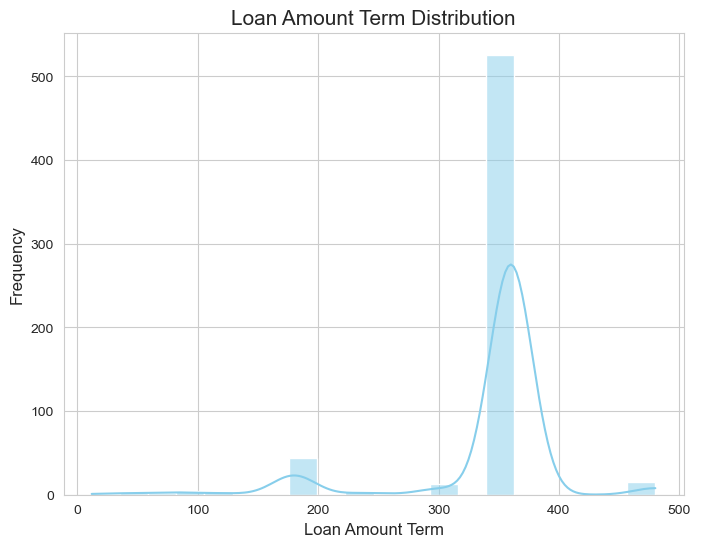

In [21]:
plt.figure(figsize=(8,6))
sns.histplot(df['Loan_Amount_Term'], bins=20, kde=True, color='skyblue')
plt.title('Loan Amount Term Distribution', fontsize=15)
plt.xlabel('Loan Amount Term', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

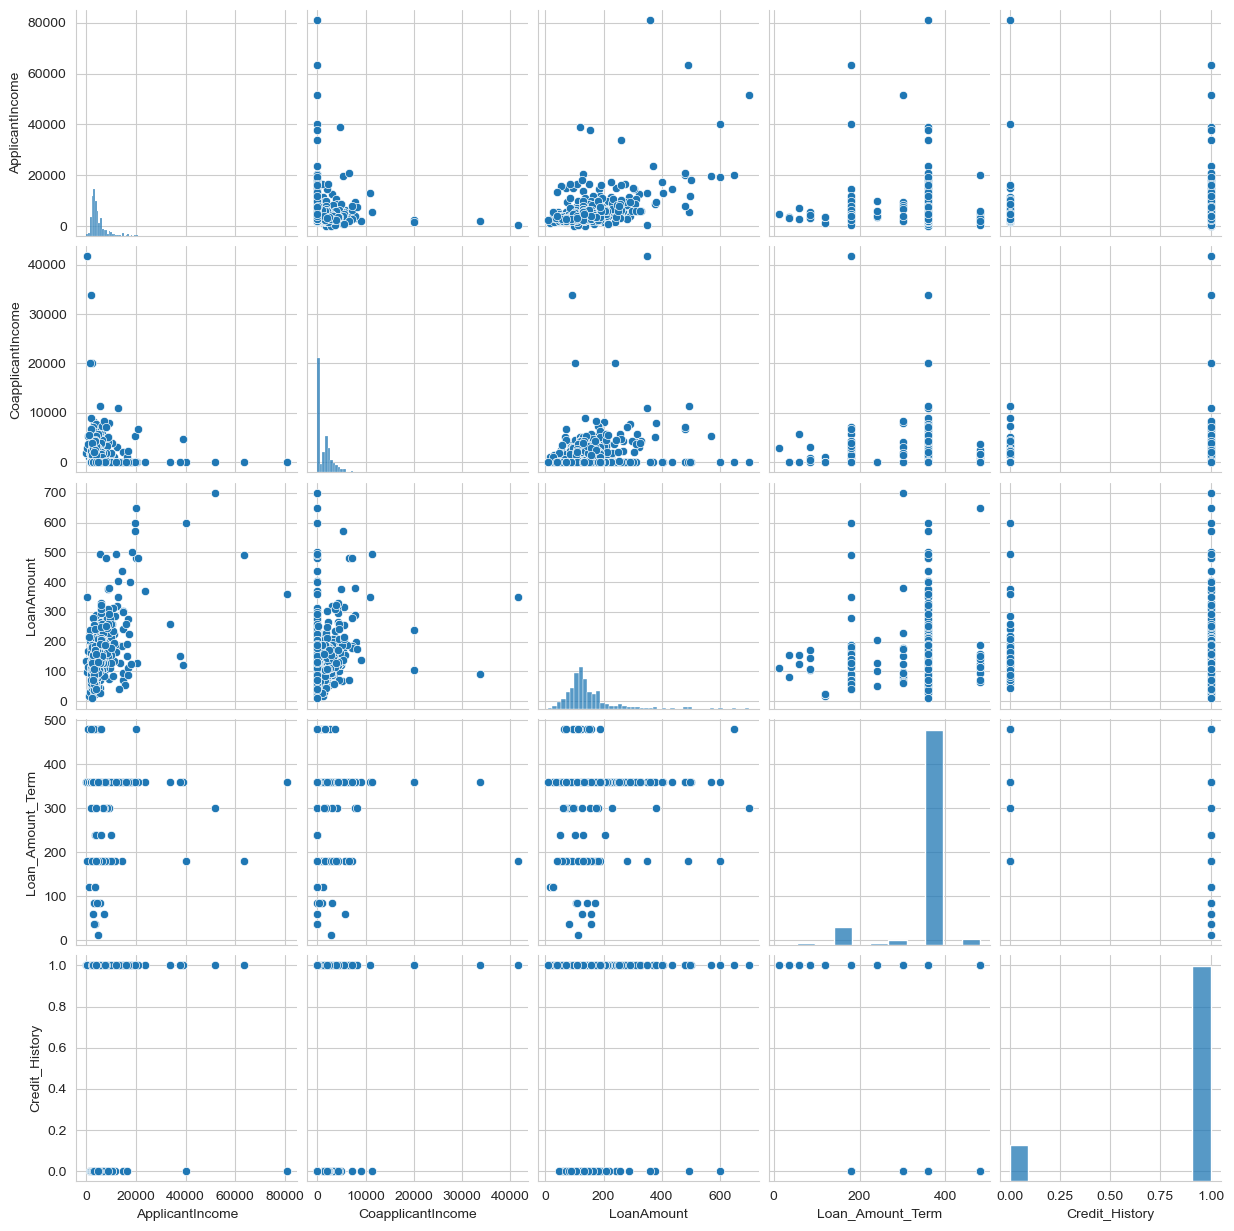

In [22]:
sns.pairplot(df, palette='viridis')
plt.show()

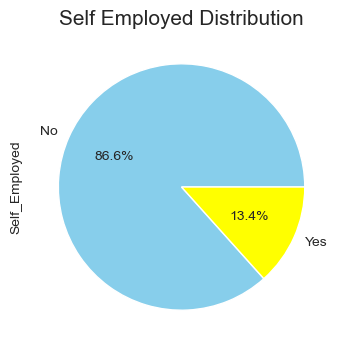

In [23]:
plt.figure(figsize=(6,4))
df['Self_Employed'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'yellow'])
plt.title('Self Employed Distribution', fontsize=15)
plt.show()

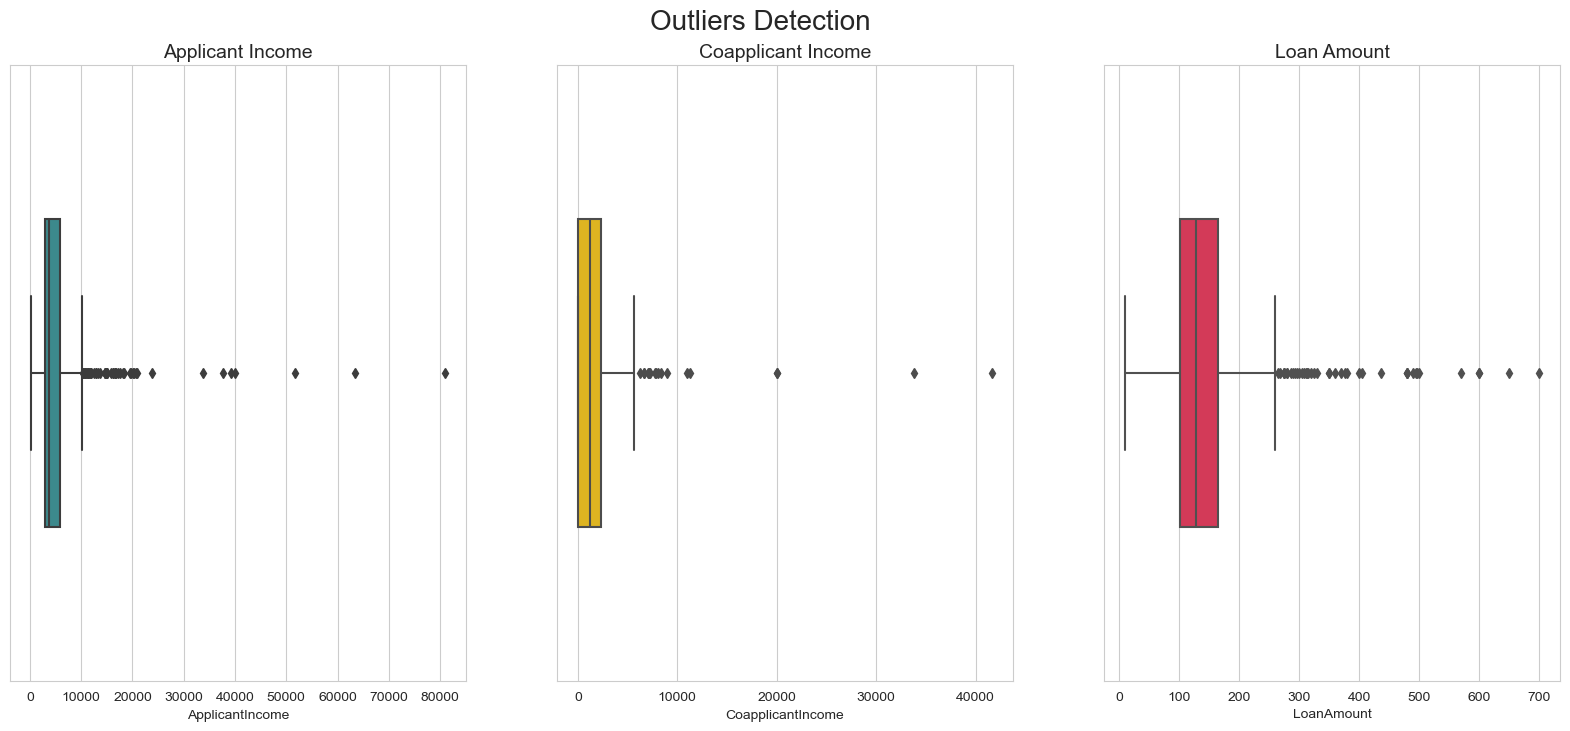

In [24]:
plt.figure(figsize=(20,8))
sns.set_style("whitegrid")

colors = ["#2F9599", "#FEC601", "#EC2049"]

plt.subplot(1,3,1)
sns.boxplot(data=df, x='ApplicantIncome', color=colors[0], width=0.5)
plt.title('Applicant Income', fontsize=14)

plt.subplot(1,3,2)
sns.boxplot(data=df, x='CoapplicantIncome', color=colors[1], width=0.5)
plt.title('Coapplicant Income', fontsize=14)

plt.subplot(1,3,3)
sns.boxplot(data=df, x='LoanAmount', color=colors[2], width=0.5)
plt.title('Loan Amount', fontsize=14)

plt.suptitle('Outliers Detection', fontsize=20, y=0.95)

plt.show()


In [25]:
print("Before Removing the outliers", df.shape) 
df = df[df['ApplicantIncome']<25000] 
print("After Removing the outliers", df.shape)

Before Removing the outliers (614, 13)
After Removing the outliers (607, 13)


In [26]:
print("Before Removing the outliers", df.shape) 
df = df[df['CoapplicantIncome']<12000] 
print("After Removing the outliers", df.shape)

Before Removing the outliers (607, 13)
After Removing the outliers (603, 13)


In [27]:
print("Before Removing the outliers", df.shape) 
df = df[df['LoanAmount']<400]
print("After Removing the outliers", df.shape)

Before Removing the outliers (603, 13)
After Removing the outliers (591, 13)


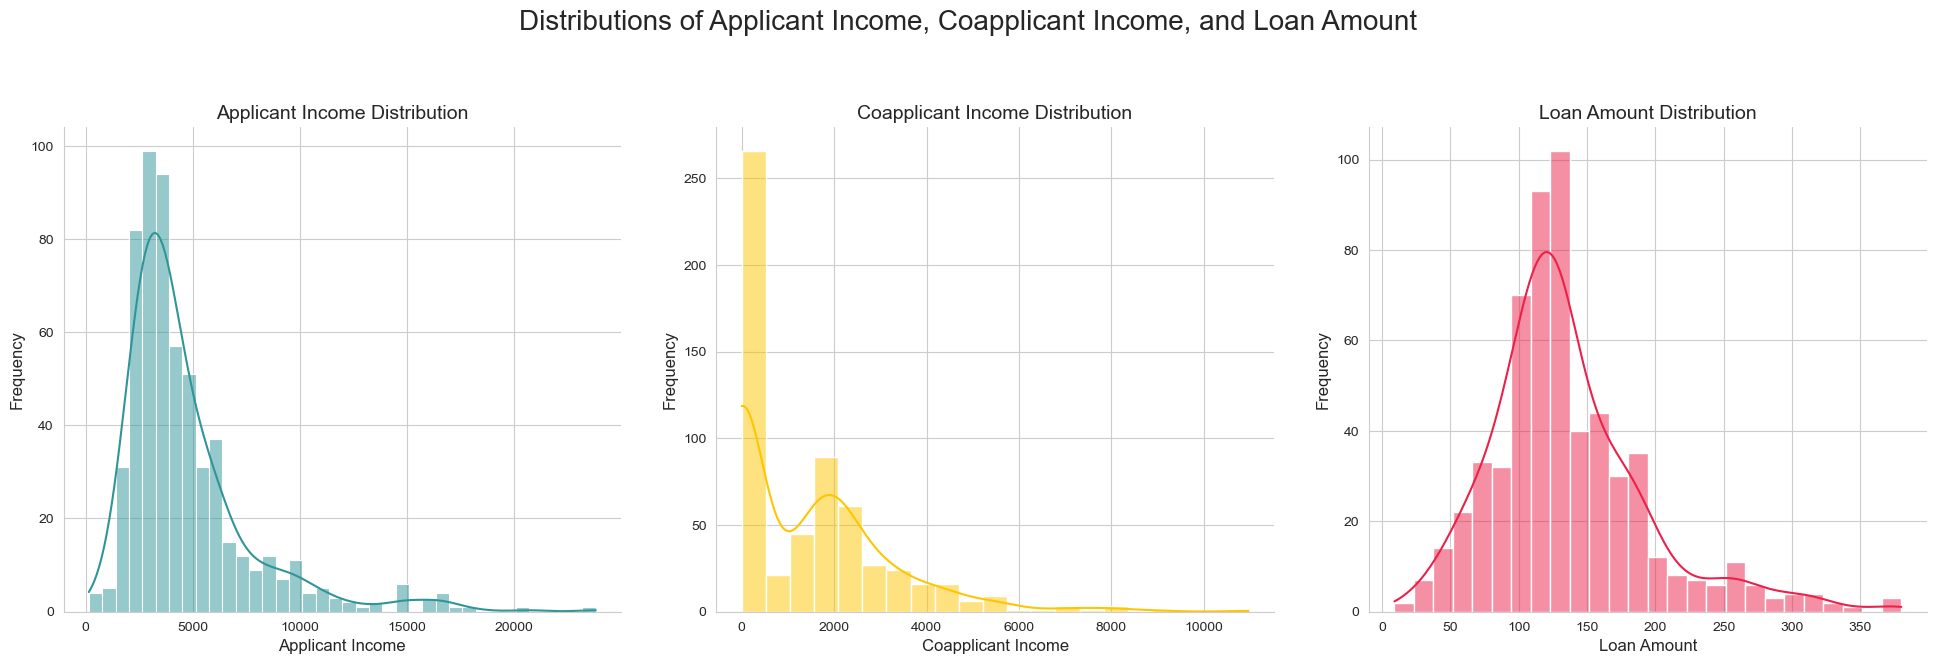

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(20, 7))

colors = ["#2F9599", "#FEC601", "#EC2049"]

sns.histplot(df['ApplicantIncome'], kde=True, color=colors[0], ax=axes[0])
axes[0].set_title('Applicant Income Distribution', fontsize=14)
axes[0].set_xlabel('Applicant Income', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)

sns.histplot(df['CoapplicantIncome'], kde=True, color=colors[1], ax=axes[1])
axes[1].set_title('Coapplicant Income Distribution', fontsize=14)
axes[1].set_xlabel('Coapplicant Income', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)

sns.histplot(df['LoanAmount'], kde=True, color=colors[2], ax=axes[2])
axes[2].set_title('Loan Amount Distribution', fontsize=14)
axes[2].set_xlabel('Loan Amount', fontsize=12)
axes[2].set_ylabel('Frequency', fontsize=12)

for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

fig.suptitle('Distributions of Applicant Income, Coapplicant Income, and Loan Amount', fontsize=20)
plt.tight_layout(pad=3.0)

plt.show()

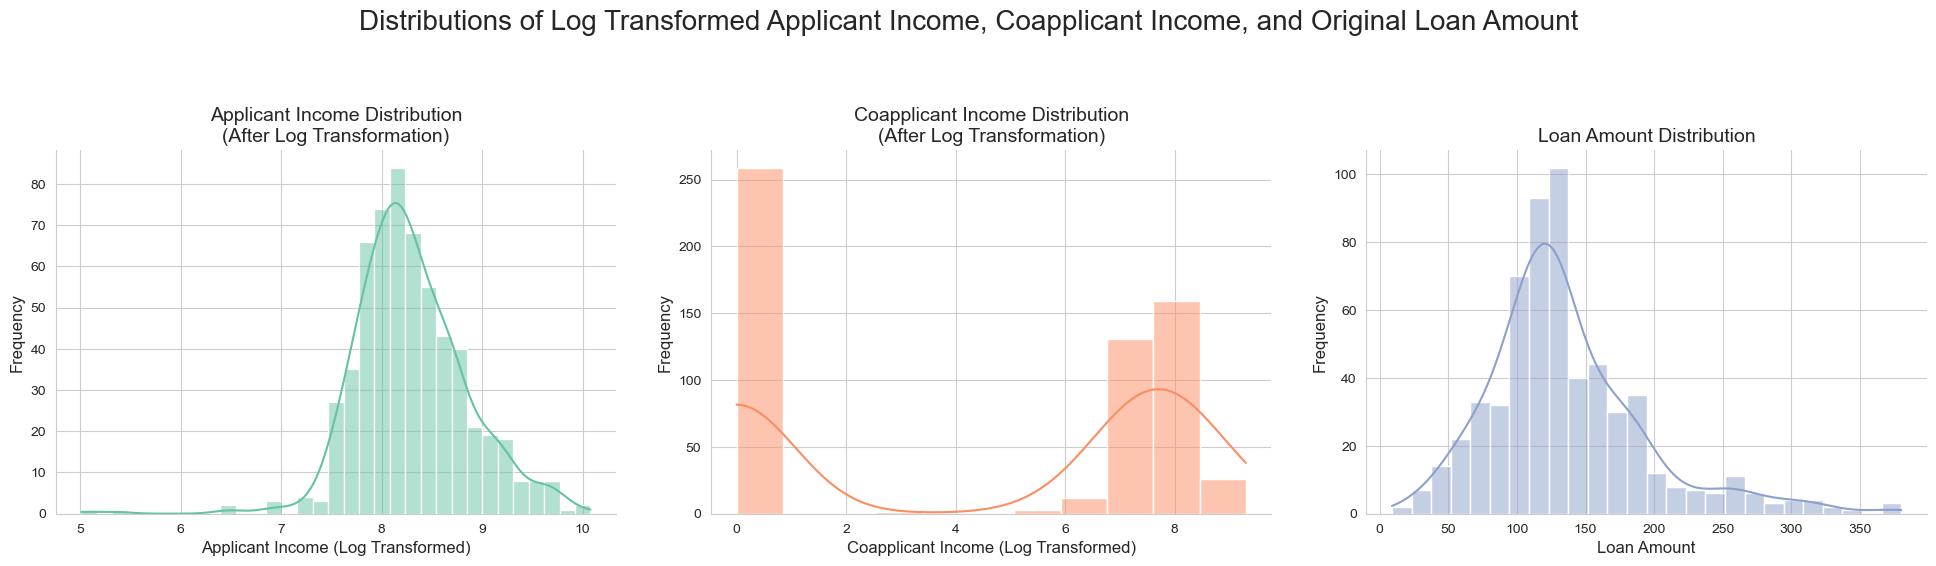

In [29]:
df['ApplicantIncome'] = np.log(df['ApplicantIncome'])
df['CoapplicantIncome'] = np.log1p(df['CoapplicantIncome'])

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

colors = ["#66c2a5", "#fc8d62", "#8da0cb"]

sns.histplot(df['ApplicantIncome'], kde=True, color=colors[0], ax=axes[0])
axes[0].set_title('Applicant Income Distribution\n(After Log Transformation)', fontsize=14)
axes[0].set_xlabel('Applicant Income (Log Transformed)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)

sns.histplot(df['CoapplicantIncome'], kde=True, color=colors[1], ax=axes[1])
axes[1].set_title('Coapplicant Income Distribution\n(After Log Transformation)', fontsize=14)
axes[1].set_xlabel('Coapplicant Income (Log Transformed)', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)

sns.histplot(df['LoanAmount'], kde=True, color=colors[2], ax=axes[2])
axes[2].set_title('Loan Amount Distribution', fontsize=14)
axes[2].set_xlabel('Loan Amount', fontsize=12)
axes[2].set_ylabel('Frequency', fontsize=12)

for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

fig.suptitle('Distributions of Log Transformed Applicant Income, Coapplicant Income, and Original Loan Amount', fontsize=20)
plt.tight_layout(pad=3.0)

plt.show()


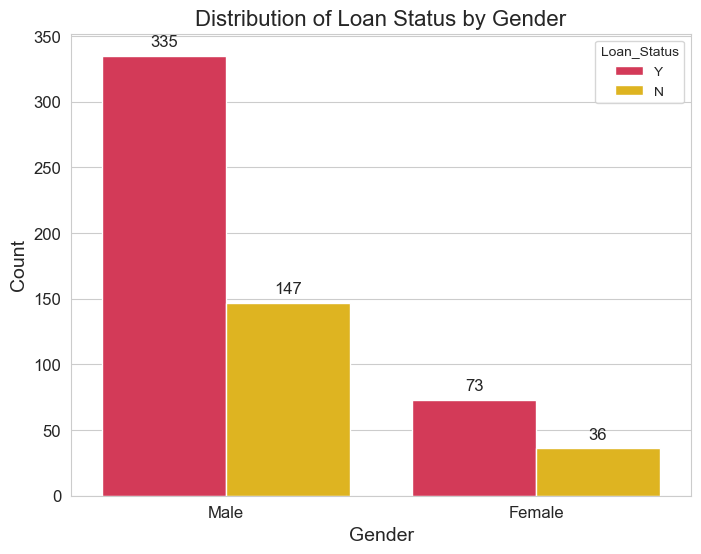

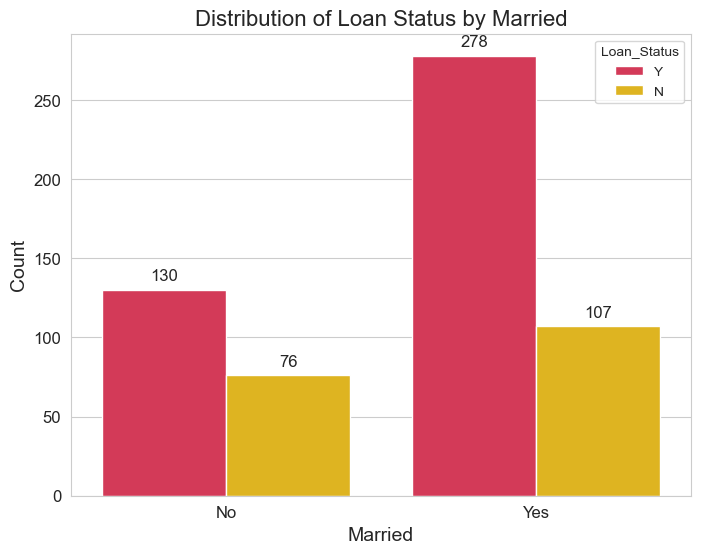

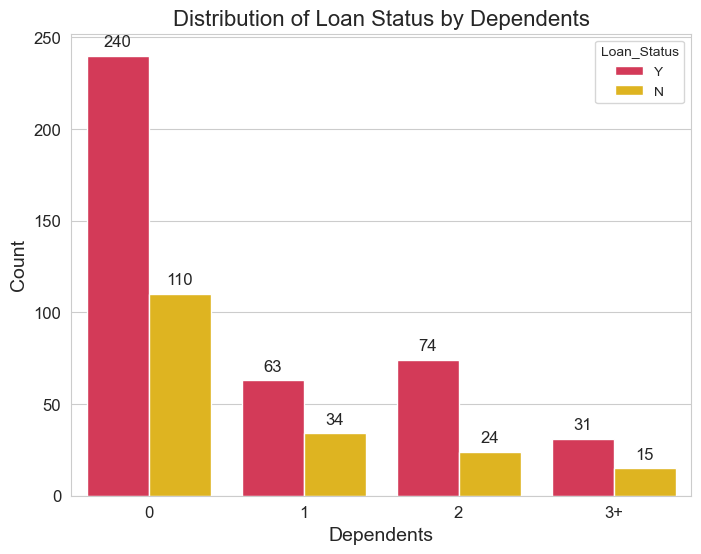

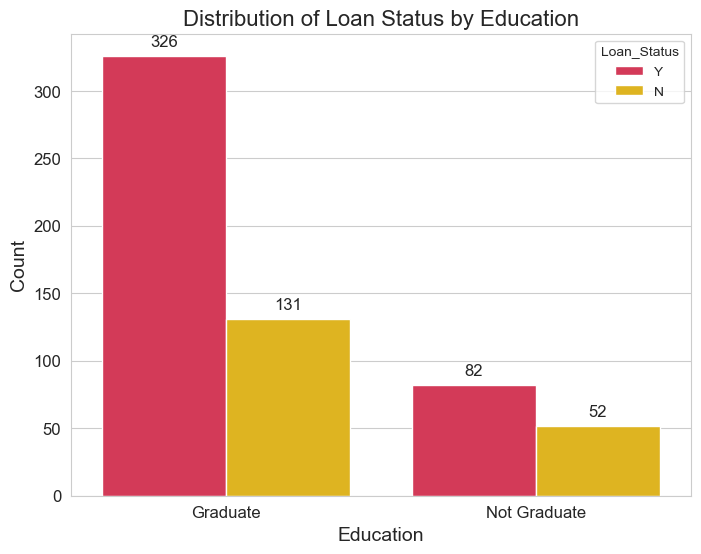

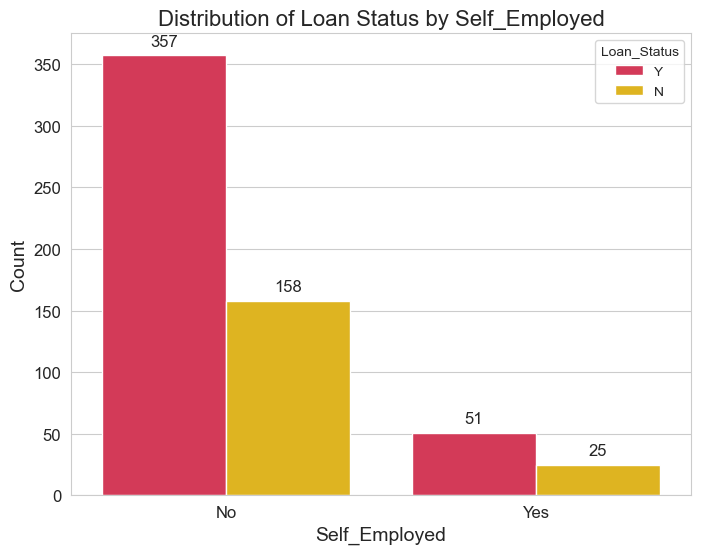

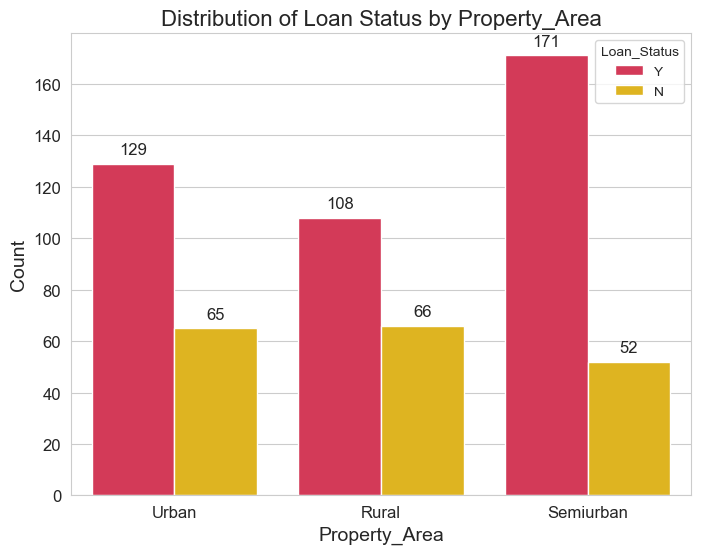

In [30]:
categorical_col = df.select_dtypes(include='object').columns
cat = categorical_col[1:-1]

colors = ["#EC2049", "#FEC601"]

for column in cat:
    plt.figure(figsize=(8,6))
    ax = sns.countplot(x=column, hue="Loan_Status", data=df, palette=colors)
    ax.set_xlabel(column, fontsize=14)
    ax.set_ylabel("Count", fontsize=14)
    plt.title('Distribution of Loan Status by '+ column, fontsize=16)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    # Displaying the count on top of the bars
    for p in ax.patches:
        ax.annotate(format(p.get_height()), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', 
                     va = 'center', 
                     xytext = (0, 10), 
                     textcoords = 'offset points',
                     fontsize = 12)
    plt.show()

In [31]:
df.select_dtypes('object').head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


In [32]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# dropping the Loan_ID as it's unique for each individual and does not contribute to the model
df = df.drop(columns='Loan_ID')

# handling categorical values
cat_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

# use label encoding to convert categorical values to numeric
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# handle numerical values
num_cols = ['Dependents']  # add other numerical columns to this list



In [34]:
print(df.columns)

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [35]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,8.674026,0.000000,128.0,360.0,1.0,2,1
1,1,1,1,0,0,8.430109,7.319202,128.0,360.0,1.0,0,0
2,1,1,0,0,1,8.006368,0.000000,66.0,360.0,1.0,2,1
3,1,1,0,1,0,7.856707,7.765993,120.0,360.0,1.0,2,1
4,1,0,0,0,0,8.699515,0.000000,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,7.972466,0.000000,71.0,360.0,1.0,0,1
610,1,1,3+,0,0,8.320205,0.000000,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8.996157,5.484797,253.0,360.0,1.0,2,1
612,1,1,2,0,0,8.933664,0.000000,187.0,360.0,1.0,2,1


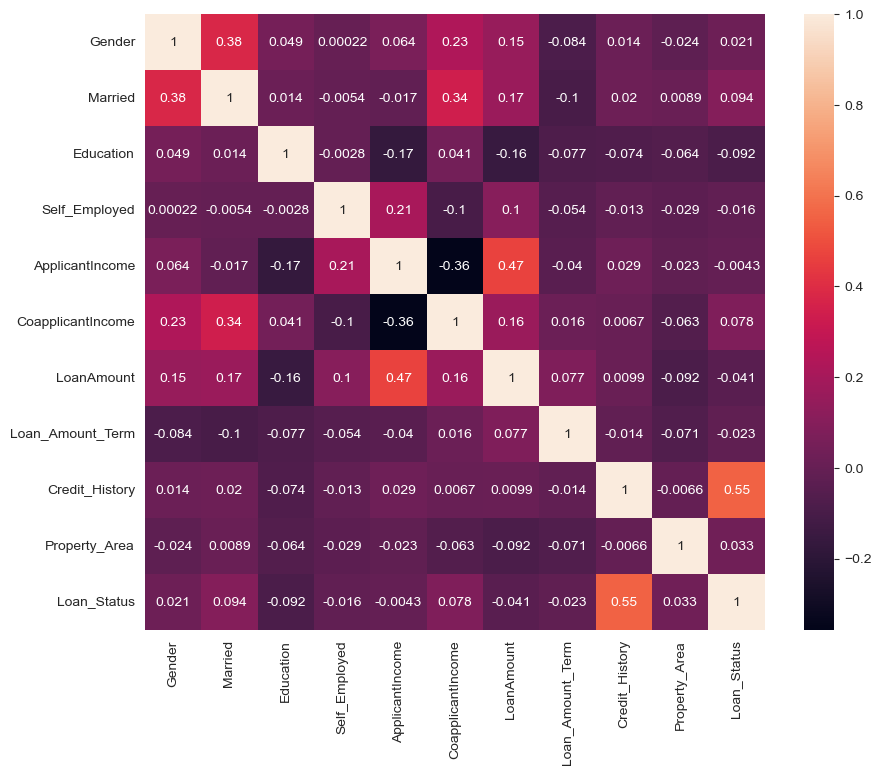

In [38]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True) 
plt.show()

In [ ]:
df['Dependents'] = df['Dependents'].replace('3+', '3')
df['Dependents'] = df['Dependents'].astype(int)

In [52]:
df['Dependents'].value_counts()

0    350
2     98
1     97
4     46
Name: Dependents, dtype: int64

In [49]:
x = df.drop(['Loan_Status'], axis = 1)

In [50]:
y = df['Loan_Status']

In [42]:
from imblearn.over_sampling import SMOTE

In [51]:
x_resample, y_resample = SMOTE().fit_resample(x, y)

In [53]:
print(x_resample.shape)
print(y_resample.shape)

(816, 11)
(816,)


In [54]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, Y_train, Y_test = train_test_split(x_resample, y_resample, test_size = 0.2)

In [78]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

def evaluate_model(model, X_train, Y_train, X_test, Y_test):
    model.fit(X_train, Y_train)
    
    y_pred = model.predict(X_test)
    
    train_accuracy = model.score(X_train, Y_train)
    test_accuracy = model.score(X_test, Y_test)
    
    print(f"Model: {str(model)}")
    print(f"\nModel Accuracy: {accuracy_score(Y_test, y_pred)}")
    print(f"\nTraining Accuracy: {train_accuracy} \nTesting Accuracy: {test_accuracy}")
    print('--------------------------------------')
    
    return model

knn = evaluate_model(KNeighborsClassifier(), X_train, Y_train, X_test, Y_test)
svc = evaluate_model(SVC(), X_train, Y_train, X_test, Y_test)
dt = evaluate_model(DecisionTreeClassifier(), X_train, Y_train, X_test, Y_test)
lr = evaluate_model(LogisticRegression(), X_train, Y_train, X_test, Y_test)
gnb = evaluate_model(GaussianNB(), X_train, Y_train, X_test, Y_test)
rfc = evaluate_model(RandomForestClassifier(), X_train, Y_train, X_test, Y_test)


Model: KNeighborsClassifier()

Model Accuracy: 0.6646341463414634

Training Accuracy: 0.7776073619631901 
Testing Accuracy: 0.6646341463414634
--------------------------------------
Model: SVC()

Model Accuracy: 0.43902439024390244

Training Accuracy: 0.5276073619631901 
Testing Accuracy: 0.43902439024390244
--------------------------------------
Model: DecisionTreeClassifier()

Model Accuracy: 0.7865853658536586

Training Accuracy: 1.0 
Testing Accuracy: 0.7865853658536586
--------------------------------------
Model: LogisticRegression()

Model Accuracy: 0.6951219512195121

Training Accuracy: 0.7822085889570553 
Testing Accuracy: 0.6951219512195121
--------------------------------------
Model: GaussianNB()

Model Accuracy: 0.725609756097561

Training Accuracy: 0.7776073619631901 
Testing Accuracy: 0.725609756097561
--------------------------------------
Model: RandomForestClassifier()

Model Accuracy: 0.823170731707317

Training Accuracy: 1.0 
Testing Accuracy: 0.823170731707317
----

In [79]:
from sklearn.model_selection import GridSearchCV

# Set the parameters by cross-validation
tuned_parameters = [{'n_estimators': [50, 100, 200, 500], 
                     'max_depth' : [5, 10, 15, 20, None],
                     'min_samples_split': [2, 5, 10],
                     'min_samples_leaf': [1, 2, 4]}]

rfc = RandomForestClassifier(random_state=42)

clf = GridSearchCV(rfc, tuned_parameters, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

clf.fit(X_train, Y_train)

print("Best parameters set found on development set:")
print(clf.best_params_)

print("Detailed classification report:")
y_true, y_pred = Y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

Fitting 5 folds for each of 180 candidates, totalling 900 fits
Best parameters set found on development set:
{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Detailed classification report:
              precision    recall  f1-score   support

           0       0.94      0.69      0.80        95
           1       0.69      0.94      0.80        69

    accuracy                           0.80       164
   macro avg       0.82      0.82      0.80       164
weighted avg       0.84      0.80      0.80       164



In [83]:
best_params = {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
rfc_best = RandomForestClassifier(**best_params, random_state=42)

In [84]:
rfc_best.fit(X_train, Y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=50, random_state=42)

In [85]:
y_pred_rfc = rfc_best.predict(X_test)

In [86]:
print("Detailed classification report:")
print(classification_report(Y_test, y_pred_rfc))
print("Confusion Matrix:")
print(confusion_matrix(Y_test, y_pred_rfc))

Detailed classification report:
              precision    recall  f1-score   support

           0       0.94      0.69      0.80        95
           1       0.69      0.94      0.80        69

    accuracy                           0.80       164
   macro avg       0.82      0.82      0.80       164
weighted avg       0.84      0.80      0.80       164

Confusion Matrix:
[[66 29]
 [ 4 65]]


In [87]:
accuracy = accuracy_score(Y_test, y_pred_rfc)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.7987804878048781


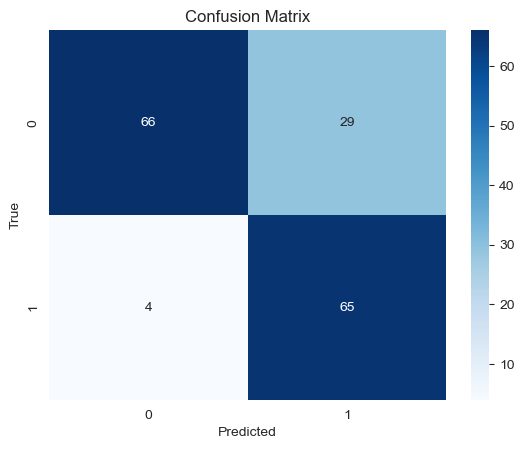

[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   0.7s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[C

In [88]:
sns.heatmap(confusion_matrix(Y_test, y_pred_rfc), annot=True, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()